This is my Jupyter Notebook where I will work through the assessment problems.

## Problem 1: Basic FAANG Data Acquisiton using yFinance

First, I need to import all the packages/modules I will require to write my code and obtain the relevant data.

In [57]:
!pip install yfinance
# Downloads and installs the yfinance package.
# Will only download yfinance if the package hasn't previously been downloaded.

1934.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


The following Python packages are used in this problem:

- `yfinance`: To access historical financial data directly from Yahoo Finance using its public API.
- `pandas`: To manipulate and export the downloaded data into a `.csv` file.
- `datetime`: To create a timestamp for the file naming convention.
- `os`: To check if the `data/` folder exists and create it if necessary.

References:
- `yfinance` Documentation: [https://pypi.org/project/yfinance/](https://pypi.org/project/yfinance/)  
- `pandas` Official Documents: [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)  
- Python Standard Library (datetime & os): [https://docs.python.org/3/library/](https://docs.python.org/3/library/)

In [58]:
import yfinance as yf
# imports the yfinance package
import pandas as pd
# imports pandas
import datetime as dt
# imports datetime
import os
# imports os
import matplotlib.pyplot as plt

Now that I have the packages, I require I can now start making the program.


This section defines a function called `get_data()` this downloads the hourly stock price data for the previous five days for the five FAANG companies:  

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The data is saved into a folder named `data/` within the project directory, with a the filename will be a timestamp in the format:

YYYYMMDD-HHmmss.csv
(e.g. 20251112-213215.csv)

This timestamp ensures each download is unique and prevents overwriting of existing files.

References:
- Yahoo Finance (data source): [https://finance.yahoo.com/](https://finance.yahoo.com/)

In [59]:
def get_data():
    # This first section downloads hourly data for the last 5 days for FAANG (META, AAPL, AMZN, NFLX, GOOG)
    # It then saves the data in the required format in a .csv file.

    # Produce the ticker list for the required companies.
    # This essentially means I will get the stocks for the 5 companies.
    tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]

    # This next section of code downloads the data for the last 5 days.
    # Variables: period = 5 days, interval = 1 hour.
    # The variables and period selected mean that for the last 5 calendar days, 
    # I get the data for each hour. 
    # group_by = "ticker" means the returned DataFrame will contain columns grouped by ticker.
    data = yf.download(
        tickers,
        period="5d",
        interval="1h",      # Must use "1h" (not "1hr") for hourly data
        group_by="ticker",
        auto_adjust=True
    )

    # Ensure the 'data' folder exists
    os.makedirs("data", exist_ok=True)

    # Create timestamped filename 
    # The format is YYYYMMDD-HHmmss, e.g. 20251112-213215.csv
    timestamp = dt.datetime.now().strftime("%Y%m%d-%H%M%S")
    filename = f"data/{timestamp}.csv"
    
    # Save data to CSV
    data.to_csv(filename)
    
    # Print confirmation message
    print(f"Data saved to {filename}")

# Run the function to execute everything
get_data()


[*********************100%***********************]  5 of 5 completed

Data saved to data/20251116-013045.csv


## Problem 2: Plotting the Data

The upcoming function def plot_data() loads the most recent CSV file from the 'data' folder, extracts the close prices for all five FAANG stocks,and plots them on a single chart.
    
The plot created includes:
- A title showing the date of the data
- Axis labels
- A legend
- A timestamped filename
    
The function then saves the plot to the 'plots' folder.

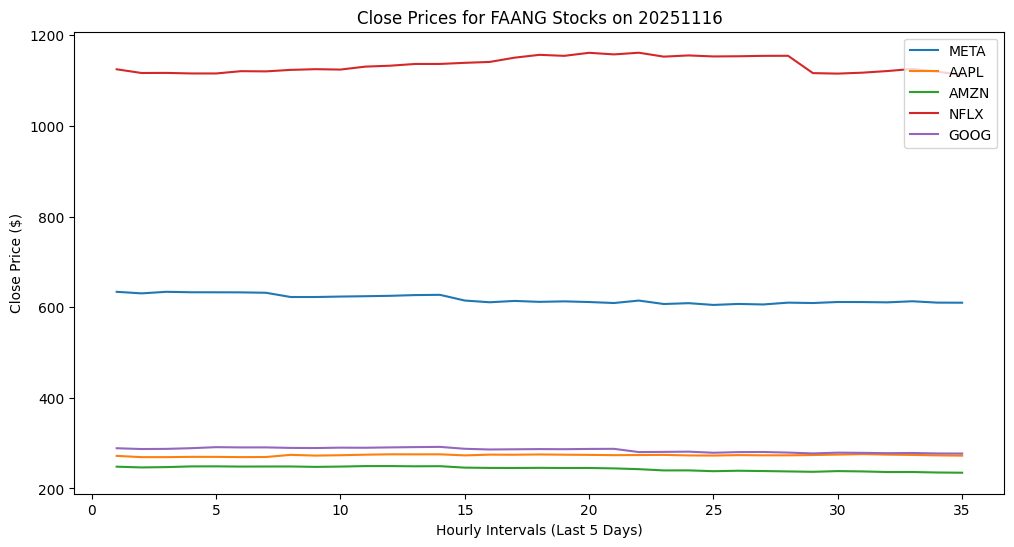

Plot saved to plots/2025MMDD-013045.png


In [60]:
def plot_data():

    # Ensure the 'plots' folder exists
    os.makedirs("plots", exist_ok=True)

    # Get list of CSV files in the data folder
    files = [f for f in os.listdir("data") if f.endswith(".csv")]
    if not files:
        raise FileNotFoundError("No CSV files found in the 'data' folder.")

    # Sort files by name to get the latest (timestamped filename format ensures correct order)
    latest_file = sorted(files)[-1]
    filepath = os.path.join("data", latest_file)

    # Load the latest CSV file
    data = pd.read_csv(filepath, header=[0,1])  # yfinance uses MultiIndex columns when group_by='ticker'

    # Extract the date from the filename for the plot title
    date_str = latest_file.split("-")[0]

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Loop through the 5 tickers to plot close prices
    tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]
    for ticker in tickers:
        plt.plot(data[(ticker, "Close")], label=ticker)  # MultiIndex column structure

    # Add title, labels, legend
    plt.title(f"Close Prices for FAANG Stocks on {date_str}")
    plt.xlabel("Hourly Intervals (Last 5 Days)")
    plt.ylabel("Close Price ($)")
    plt.legend()

    # Create timestamped filename for the plot
    timestamp = dt.datetime.now().strftime("%YMMDD-%H%M%S")
    plot_filename = f"plots/{timestamp}.png"

    # Save the plot
    plt.savefig(plot_filename, dpi=300, bbox_inches="tight")

    # Show plot (optional for assignment, but nice in a notebook)
    plt.show()

    print(f"Plot saved to {plot_filename}")

plot_data()
